### Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
import missingno as msno

### Loading loan dataset to pandas

In [67]:
data = pd.read_csv('loan.csv', index_col=0)
data

C:\Users\gtpra\AppData\Local\Temp\ipykernel_13848\3840341585.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('loan.csv', index_col=0)


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
id,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### There is a Dtypewarning on column 47 lets see what is it

In [68]:
data.iloc[:, 46].head()

id
1077501       NaN
1077430       NaN
1077175       NaN
1076863       NaN
1075358    Jun-16
Name: next_pymnt_d, dtype: object

In [69]:
data.iloc[:, 46].value_counts()

Jun-16    1125
Jul-16      15
Name: next_pymnt_d, dtype: int64

In [70]:
data.isna().sum()

member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 110, dtype: int64

In [71]:
(data.isna().sum()==39717).value_counts()

False    56
True     54
dtype: int64

### So there are 54 columns with all missing values, Lets drop them!

In [72]:
data.dropna(axis=1, how='all', inplace=True)

In [73]:
data.shape

(39717, 56)

### Drop rows with all missing values

In [74]:
data.dropna(axis=0, how='all', inplace=True)

In [75]:
data.shape

(39717, 56)

### Now Lets see what is the percentage of missing values in remaining rows

In [76]:
(data.isna().sum()/data.shape[0])*100

member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000
delinq_2yrs                    0.000000


In [77]:
single_valued_columns_list = []
for i in data.columns:
    if data[i].value_counts().shape[0]<2:
        print(i, ' : ', data[i].unique())
        single_valued_columns_list.append(i)

pymnt_plan  :  ['n']
initial_list_status  :  ['f']
collections_12_mths_ex_med  :  [ 0. nan]
policy_code  :  [1]
application_type  :  ['INDIVIDUAL']
acc_now_delinq  :  [0]
chargeoff_within_12_mths  :  [ 0. nan]
delinq_amnt  :  [0]
tax_liens  :  [ 0. nan]


In [78]:
data[single_valued_columns_list]

,pymnt_plan,initial_list_status,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens
id,,,,,,,,,
1077501,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
1077430,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
1077175,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
1076863,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
1075358,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...
92187,n,f,NaN,1,INDIVIDUAL,0,NaN,0,NaN
90665,n,f,NaN,1,INDIVIDUAL,0,NaN,0,NaN
90395,n,f,NaN,1,INDIVIDUAL,0,NaN,0,NaN


### Droping columns which are irrelevent for analysis

In [79]:
data.drop(['pymnt_plan','initial_list_status','policy_code','application_type','acc_now_delinq','delinq_amnt'], axis=1, inplace=True)

In [80]:
data.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
id,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,...,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,0.0,0.0,0.0
1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,0.0,0.0,0.0
1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,...,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,0.0,0.0,0.0
1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,0.0,0.0,0.0
1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,...,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,0.0,0.0,0.0


In [81]:
data.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [82]:
single_valued_columns_list = []
for i in data.columns:
    if data[i].value_counts().shape[0]<=5:
        print(i, ' : ', data[i].unique())
        single_valued_columns_list.append(i)

term  :  [' 36 months' ' 60 months']
home_ownership  :  ['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE']
verification_status  :  ['Verified' 'Source Verified' 'Not Verified']
loan_status  :  ['Fully Paid' 'Charged Off' 'Current']
pub_rec  :  [0 1 2 3 4]
next_pymnt_d  :  [nan 'Jun-16' 'Jul-16']
collections_12_mths_ex_med  :  [ 0. nan]
chargeoff_within_12_mths  :  [ 0. nan]
pub_rec_bankruptcies  :  [ 0.  1.  2. nan]
tax_liens  :  [ 0. nan]


In [83]:
data.next_pymnt_d.isna().sum()/data.shape[0]

0.971296925749679

#### Next payment date column has 97% missing values and the the dates are Jun-16 and Jul-16 which are five years from 2011. 
#### So we don't need this column for analysis.

In [84]:
data.drop(['next_pymnt_d'], axis=1, inplace=True)

In [85]:
data.chargeoff_within_12_mths.isna().sum()/data.shape[0]

0.0014099755772087519

#### Member id is just ID representing the customer there no significance of this column in the analysis

In [86]:
data.drop(['member_id'], axis=1, inplace=True)

In [87]:
data.emp_title.unique().shape[0]

28821

#### There are 28K unique job titles, I don't think this is also helpfull for analysis

In [88]:
data.drop(['emp_title'], axis=1, inplace=True)

In [89]:
data.url

id
1077501    https://lendingclub.com/browse/loanDetail.acti...
1077430    https://lendingclub.com/browse/loanDetail.acti...
1077175    https://lendingclub.com/browse/loanDetail.acti...
1076863    https://lendingclub.com/browse/loanDetail.acti...
1075358    https://lendingclub.com/browse/loanDetail.acti...
                                 ...                        
92187      https://lendingclub.com/browse/loanDetail.acti...
90665      https://lendingclub.com/browse/loanDetail.acti...
90395      https://lendingclub.com/browse/loanDetail.acti...
90376      https://lendingclub.com/browse/loanDetail.acti...
87023      https://lendingclub.com/browse/loanDetail.acti...
Name: url, Length: 39717, dtype: object

#### url column seem to be the loan details of each id, so we don't neec this column also for analysis

In [90]:
data.drop(['url'], axis=1, inplace=True)

In [91]:
data[['purpose', 'title']]

,purpose,title
id,,
1077501,credit_card,Computer
1077430,car,bike
1077175,small_business,real estate business
1076863,other,personel
1075358,other,Personal
...,...,...
92187,home_improvement,Home Improvement
90665,credit_card,Retiring credit card debt
90395,debt_consolidation,MBA Loan Consolidation


In [26]:
data.purpose.unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [27]:
data.title.unique()

array(['Computer', 'bike', 'real estate business', ...,
       'Retiring credit card debt', 'MBA Loan Consolidation', 'JAL Loan'],
      dtype=object)

#### Title column is subcategory of purpose column, so Title column also not needed.

In [28]:
data.drop(['title'], axis=1, inplace=True)

In [29]:
data.zip_code.head()

id
1077501    860xx
1077430    309xx
1077175    606xx
1076863    917xx
1075358    972xx
Name: zip_code, dtype: object

#### Zip code column might be required if we want to analyze defaulter from each area but there are more than 800 unique values are present in this column, so i am ignoring for now.

In [30]:
data.drop(['zip_code'], axis=1, inplace=True)

In [31]:
data.mths_since_last_record.isna().sum()/data.shape[0]

0.9298537150338646

#### The number of months since the last public record. column has 92% missing values, so removing this columns

In [32]:
data.drop(['mths_since_last_record'], axis=1, inplace=True)

In [33]:
data.open_acc.unique()

array([ 3,  2, 10, 15,  9,  7,  4, 11, 14, 12, 20,  8,  6, 17,  5, 13, 16,
       30, 21, 18, 19, 27, 23, 34, 25, 22, 24, 26, 32, 28, 29, 33, 31, 39,
       35, 36, 38, 44, 41, 42], dtype=int64)

In [35]:
data.emp_length.fillna('Unknown', inplace=True)

In [37]:
data.pub_rec_bankruptcies.fillna('Unknown', inplace=True)

In [47]:
data.desc.isna().sum()/data.shape[0]

0.3258050708764509

In [48]:
data.mths_since_last_delinq.isna().sum()/data.shape[0]

0.6466248709620566

#### Removing months since last delinq and desc column as they have more than 30% missing values

In [49]:
data.drop(['mths_since_last_delinq', 'desc'], axis=1, inplace=True)

<AxesSubplot:>

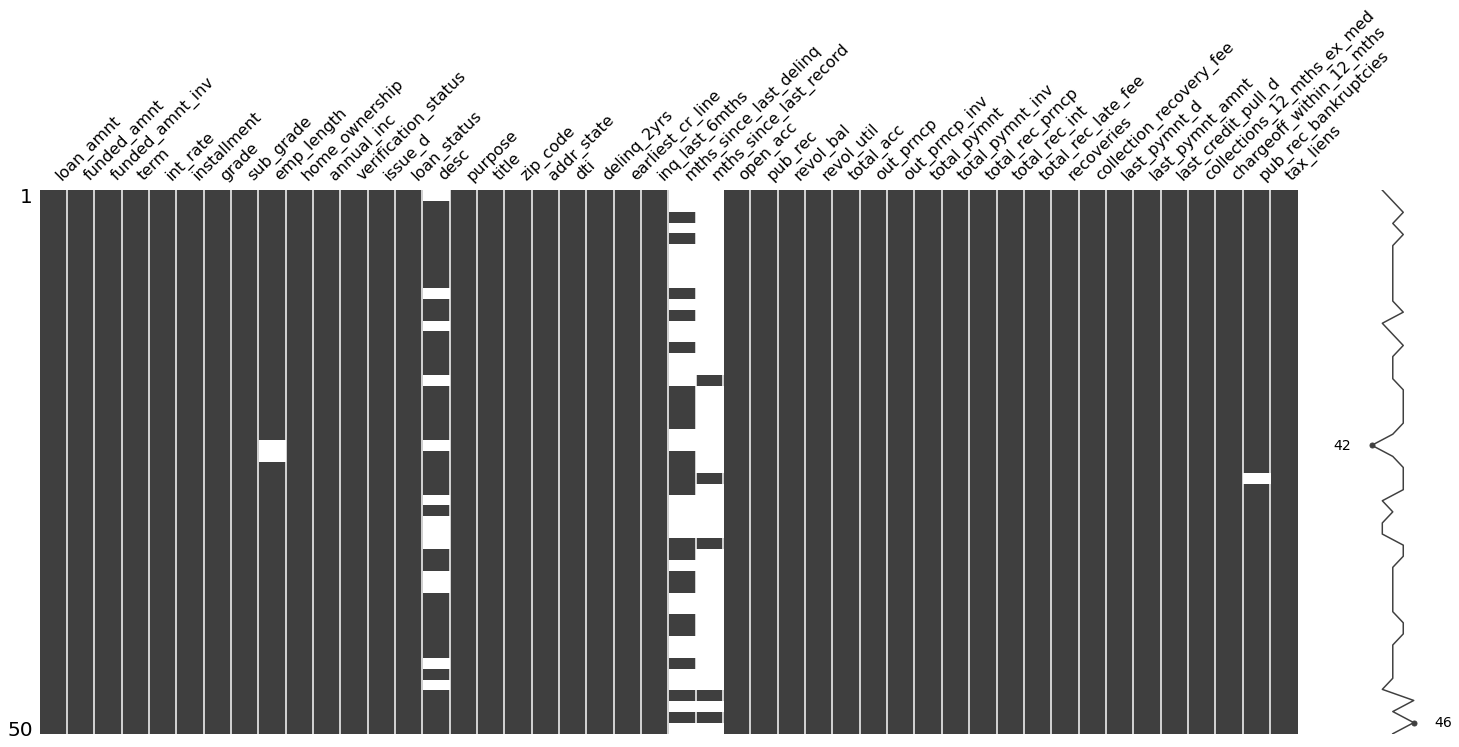

In [92]:
msno.matrix(data.sample(50))

<AxesSubplot:>

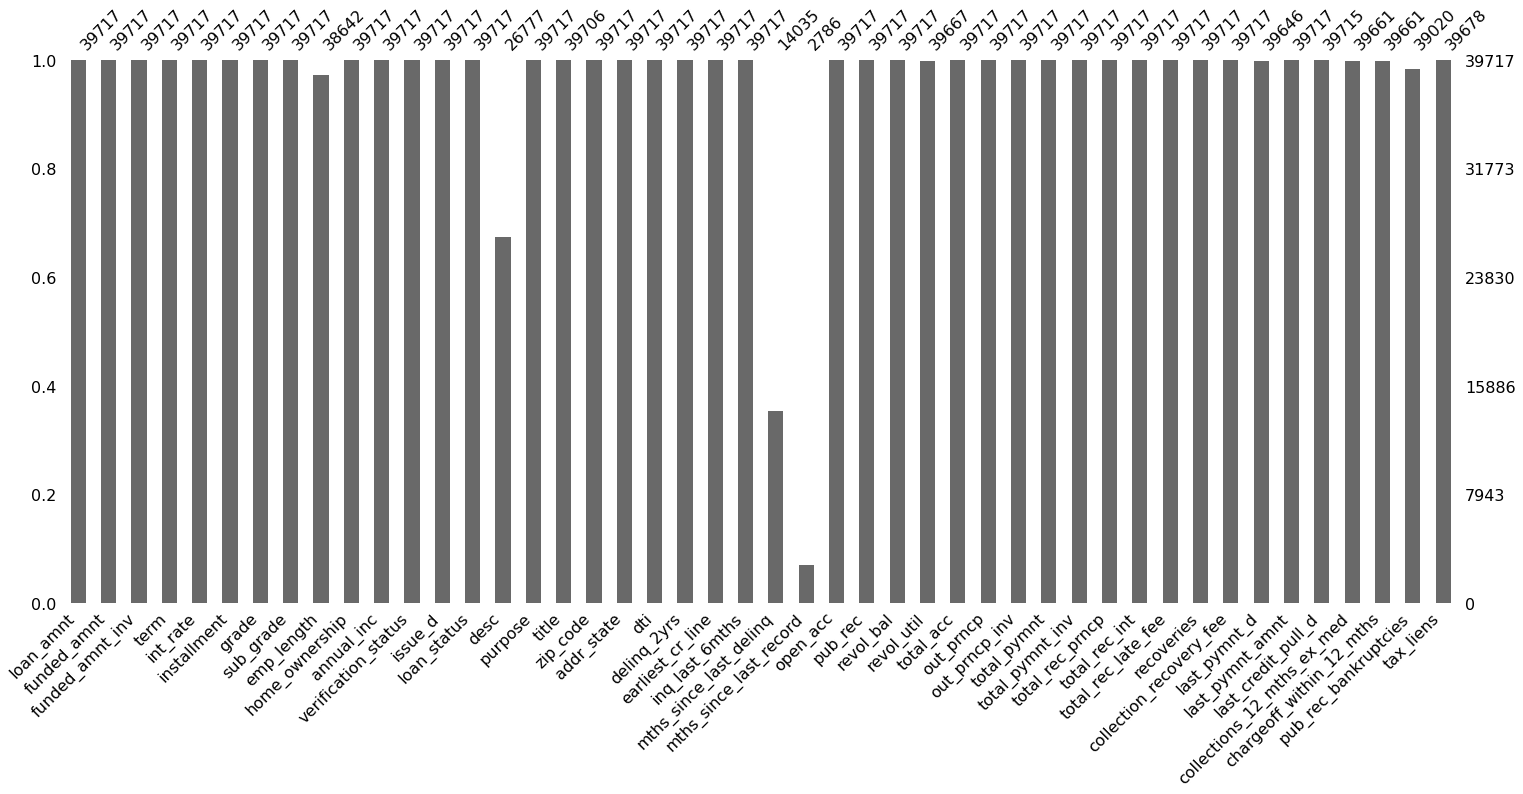

In [93]:
msno.bar(data)

In [53]:
data.shape

(39717, 41)

In [52]:
data.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,chargeoff_within_12_mths,tax_liens
count,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,...,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,39661.0,39678.0
mean,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,9.294408,0.055065,...,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,0.0,0.0
std,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,4.400282,0.237200,...,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,0.0,0.0
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
25%,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,6.000000,0.000000,...,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,0.0,0.0
50%,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,0.000000,...,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.0,0.0,0.0
75%,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,12.000000,0.000000,...,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.0,0.0,0.0
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,...,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,0.0,0.0,0.0


## Lets Analyze the data and find the outliers and see if can derive new variables.

<AxesSubplot:xlabel='loan_amnt'>

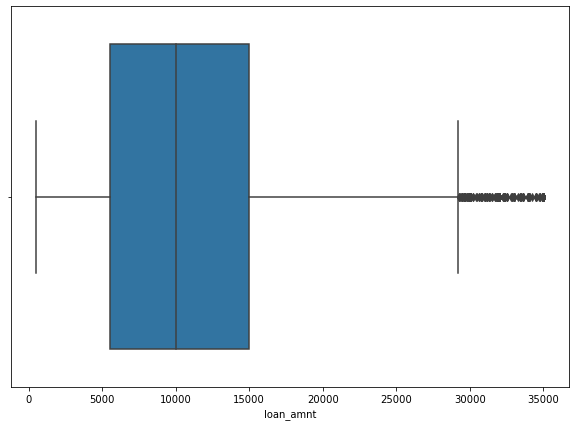

In [56]:
plt.figure(figsize=(10,7))
sns.boxplot(x=data.loan_amnt)

<AxesSubplot:xlabel='loan_amnt', ylabel='loan_status'>

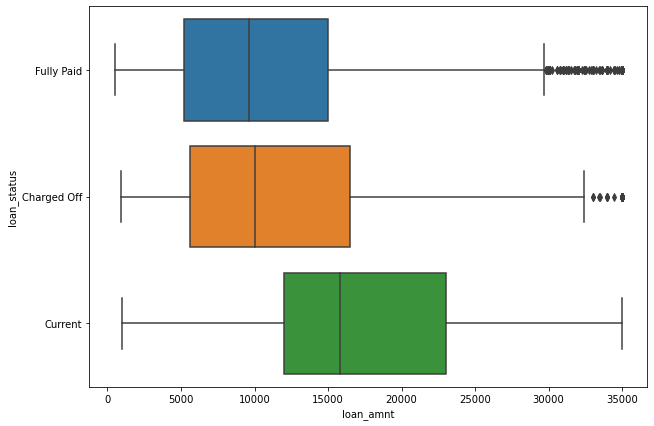

In [65]:
plt.figure(figsize=(10,7))
sns.boxplot(x=data.loan_amnt, y=data.loan_status)

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

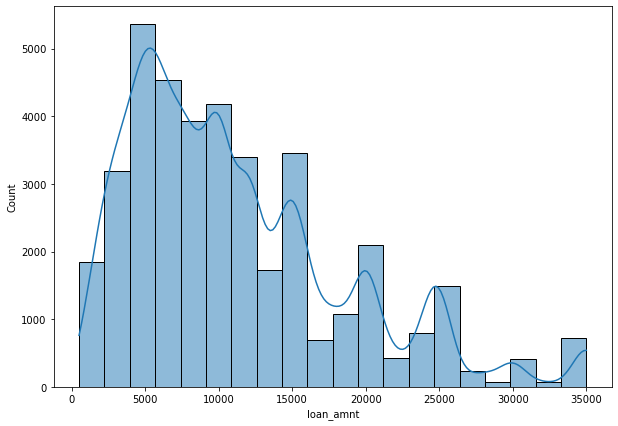

In [60]:
plt.figure(figsize=(10,7))
sns.histplot(x=data.loan_amnt, bins=20, kde=True)

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

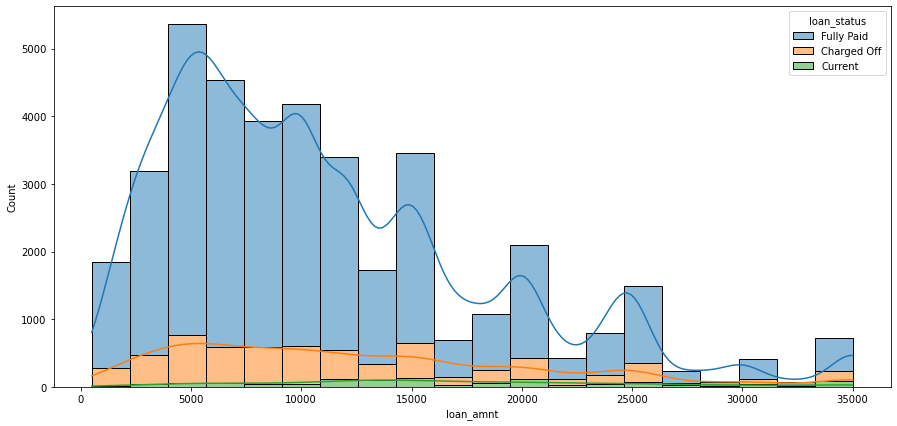

In [96]:
plt.figure(figsize=(15,7))
sns.histplot(x=data.loan_amnt, bins=20, kde=True, hue=data.loan_status, multiple='stack')

In [100]:
data.chargeoff_within_12_mths.value_counts()

0.0    39661
Name: chargeoff_within_12_mths, dtype: int64